In [1]:
#Import library
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.stats import zscore # Helps me normalize the numerical columns
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics

### Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [2]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

pima_df = pd.read_csv("pima-indians-diabetes.data", names= colnames)
pima_df.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [3]:
# Eye ball the imported dataset

### Check dimension of dataset

In [4]:
pima_df.shape

(768, 9)

### Check distribution of dependent variable, Outcome and plot it (1 Marks)

In [5]:
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


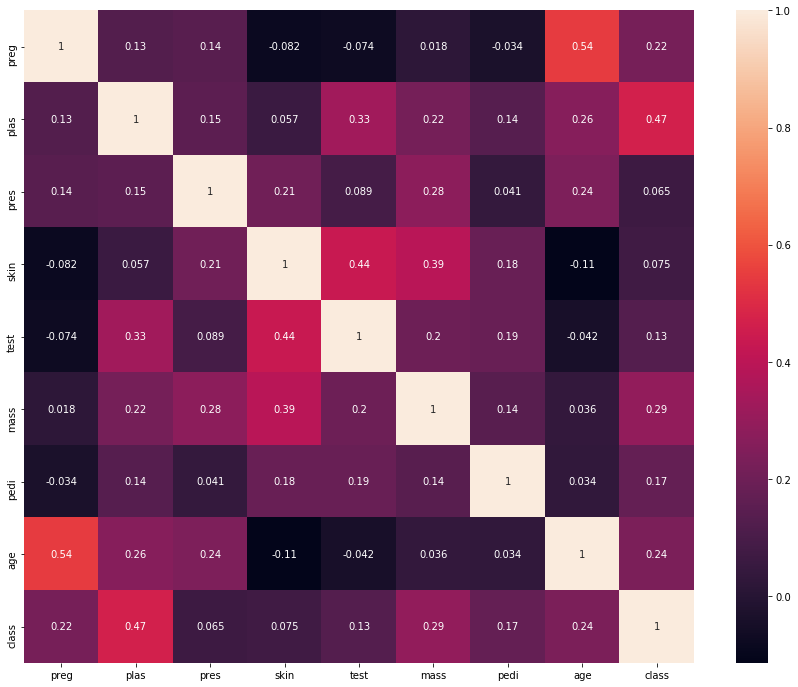

In [6]:
plt.figure(figsize=(15, 12))

pima_df_corr = pima_df.corr()
sns.heatmap(pima_df_corr,
            xticklabels = pima_df_corr.columns.values,
            yticklabels = pima_df_corr.columns.values,
            annot = True);

In [7]:
pima_df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [8]:
pima_df.groupby(['class']).count()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [9]:
# Check data types and info of dataset

### Check data distribution using summary statistics and provide your findings(2 Marks)

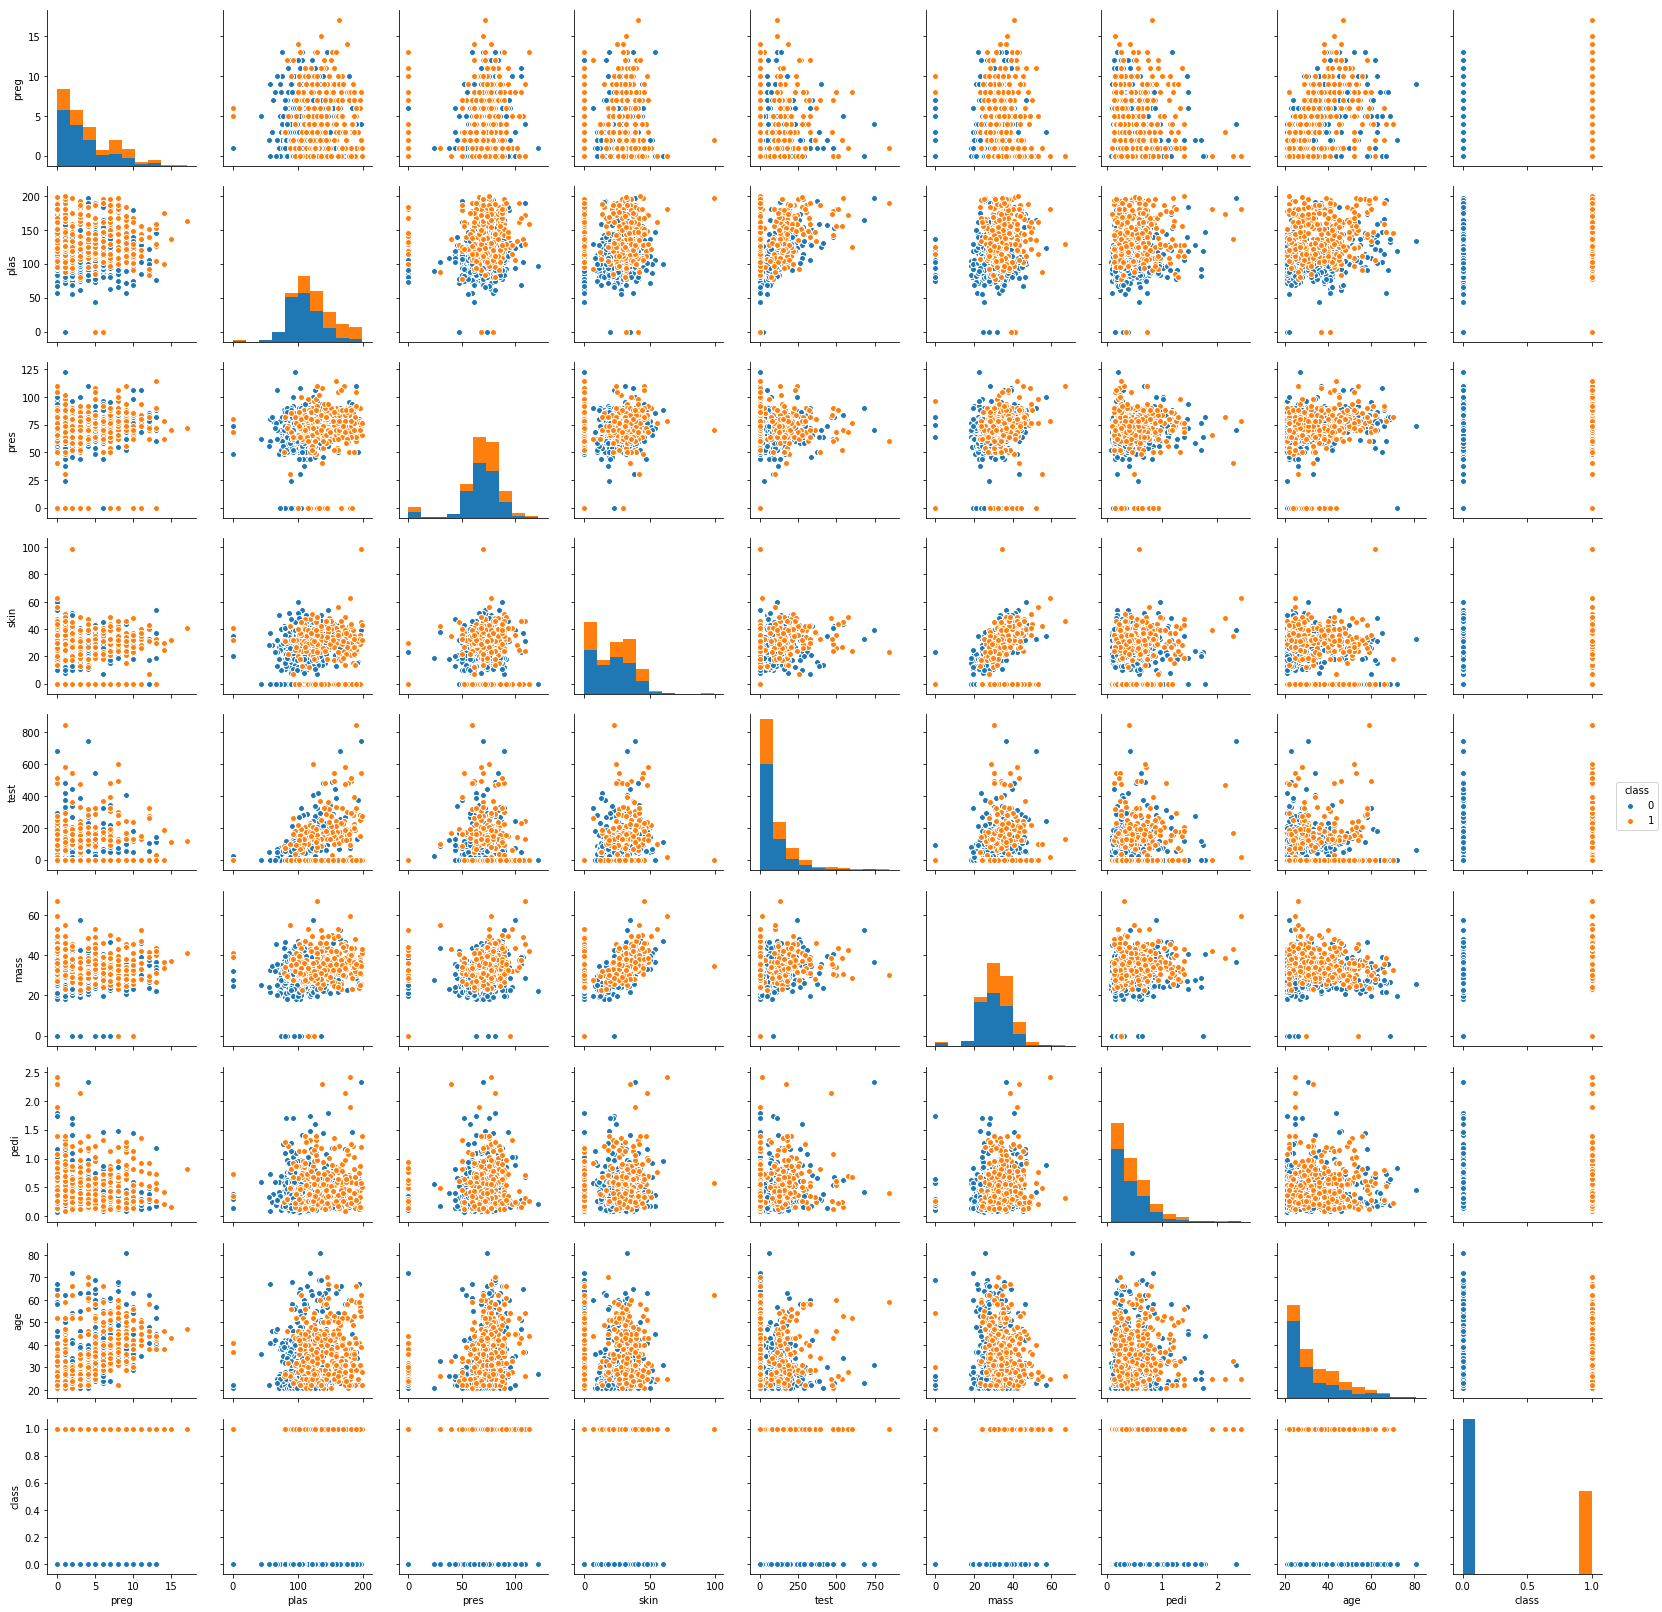

In [10]:
sns.pairplot(pima_df , hue='class' );

C:\Users\sharan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sharan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


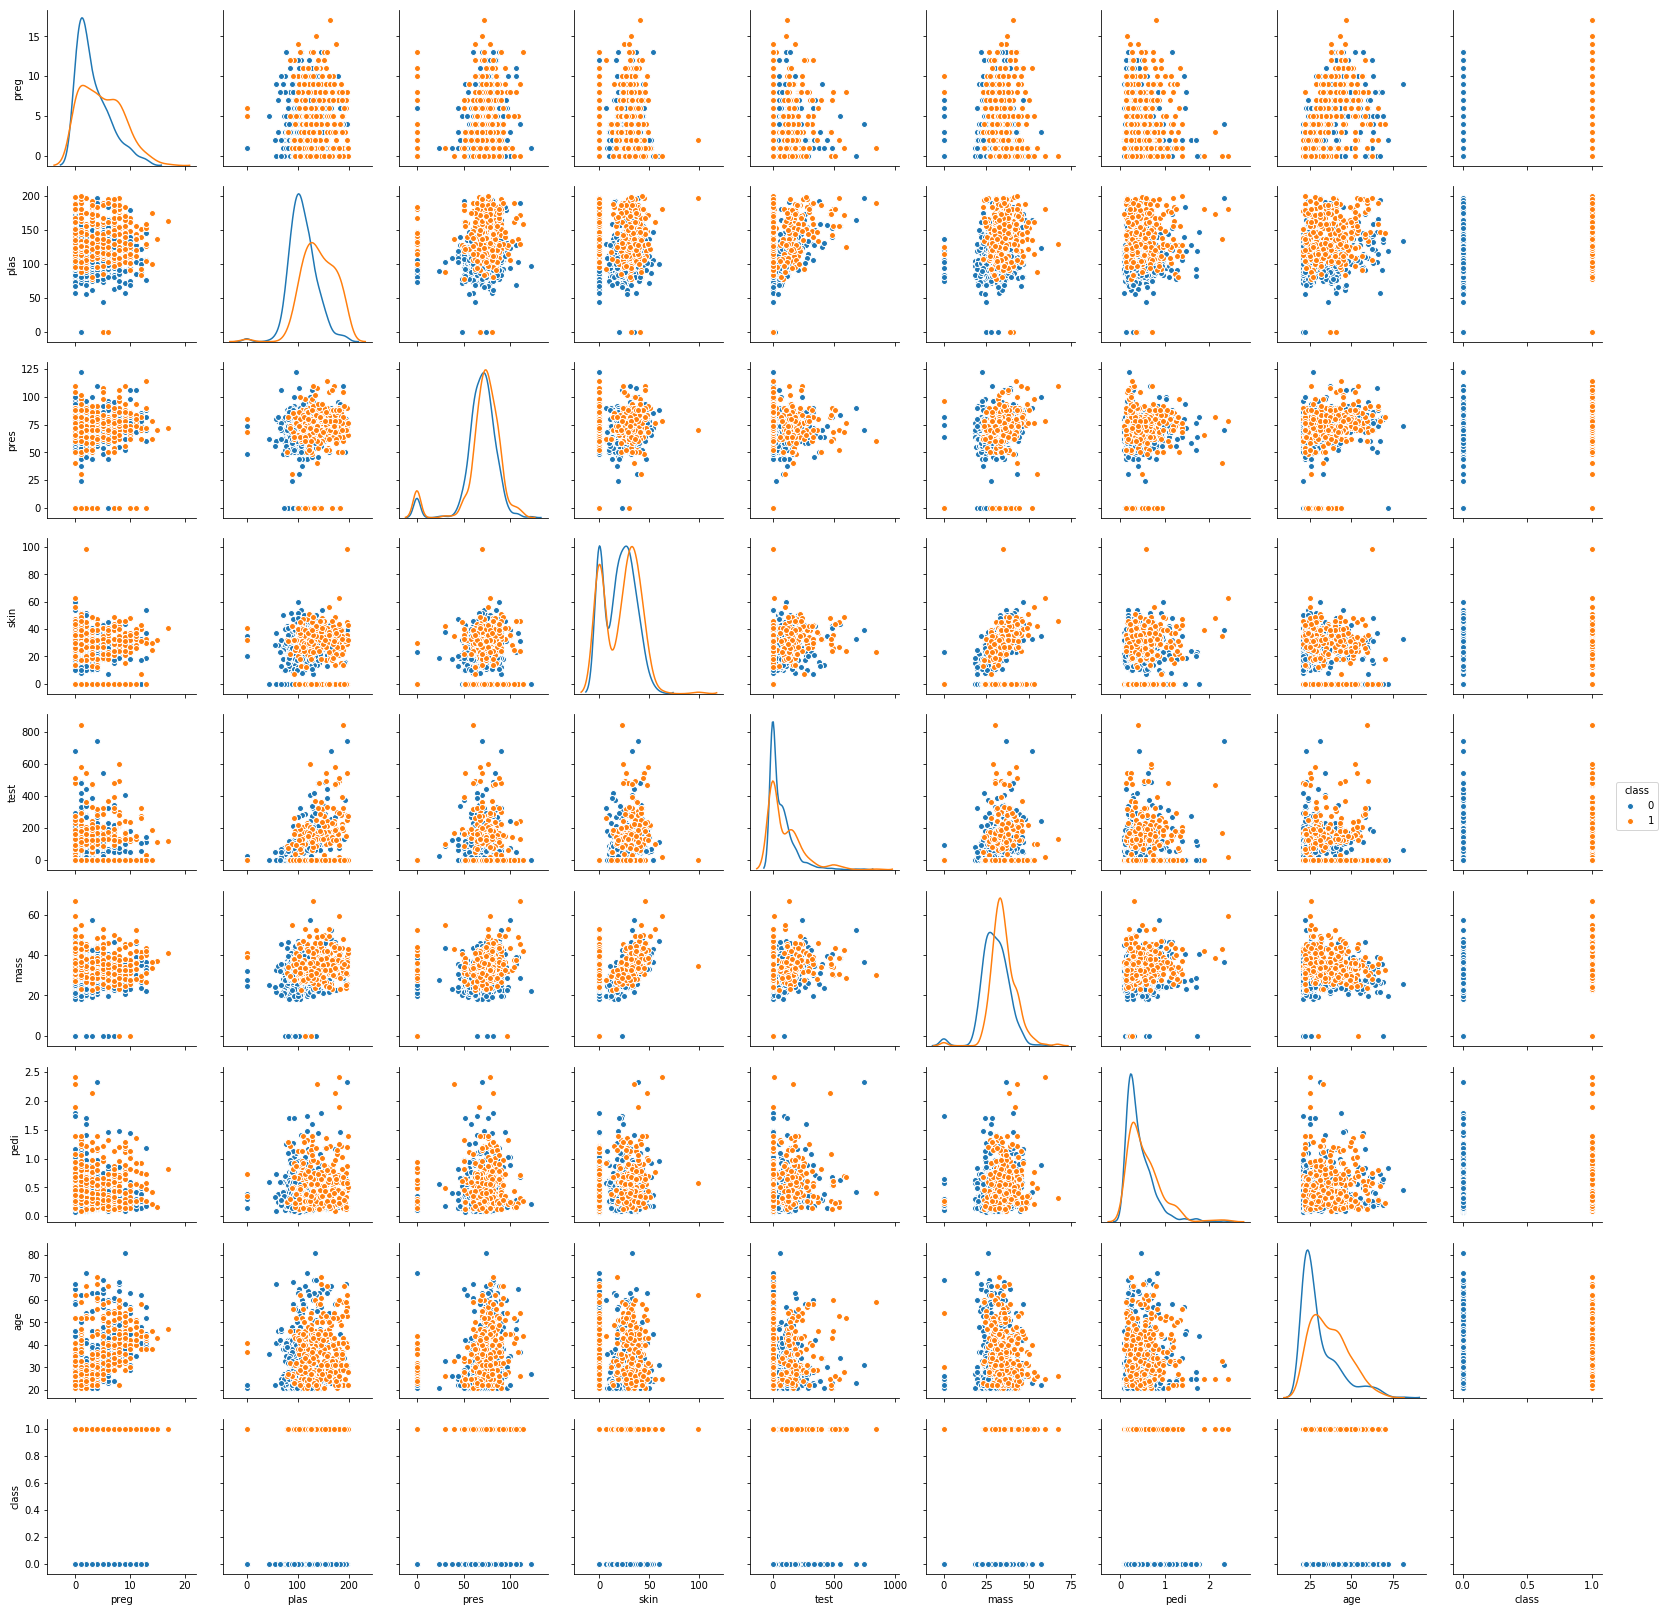

In [11]:
sns.pairplot(pima_df , hue='class' , diag_kind = 'kde')

the feature pedi seems to have most correlation with the target class variable.

### Do correlation analysis and bivariate viualization with Insights(1 Marks)

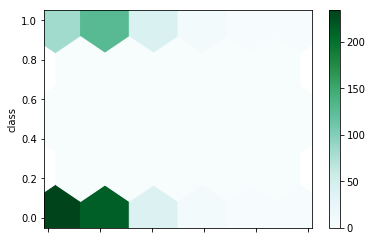

In [12]:
pima_df.plot.hexbin(x='pedi',y='class',gridsize=5)

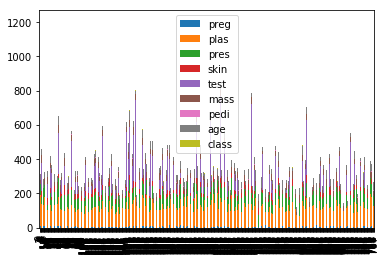

In [13]:
pima_df.plot.bar(stacked=True)

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [14]:
array = pima_df.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 1  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

### Train Support Vector Machine Model(1 Marks)

In [15]:
# use from sklearn.svm import SVC

from sklearn import svm
svm = svm.SVC(C= 1, kernel='linear',random_state=1)
svm.fit(X_train,y_train)
pred=svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred))
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,pred))

Accuracy: 0.7922077922077922
Confusion Metrix:
 [[133  13]
 [ 35  50]]


In [16]:
# your insights

In [22]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_scaled.shape

(768, 7)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.40, random_state=2, stratify=Y)

### Scale the data points using MinMaxScaler ( 1 Marks)

In [33]:
    from sklearn import preprocessing
    scaler = preprocessing.MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

In [34]:
X.shape

(768, 7)

In [35]:
X_scaled.shape

(768, 7)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.40, random_state=2, stratify=Y)

### Fit SVM Model on Scale data and give your observation( 1 Marks)

In [37]:
from sklearn import svm
svm = svm.SVC(C= 1, kernel='linear',gamma= 1, random_state=1)
svm.fit(X_train,Y_train)
pred=svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test,pred))
print("Confusion Metrix:\n",metrics.confusion_matrix(Y_test,pred))

Accuracy: 0.7824675324675324
Confusion Metrix:
 [[190  11]
 [ 56  51]]


In [21]:
X.shape

(768, 7)

#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [38]:
from sklearn import svm
svm = svm.SVC(C= 1000, kernel='linear',gamma= 1, random_state=1)
svm.fit(X_train,Y_train)
pred=svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test,pred))
print("Confusion Metrix:\n",metrics.confusion_matrix(Y_test,pred))

Accuracy: 0.7727272727272727
Confusion Metrix:
 [[182  19]
 [ 51  56]]


### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [28]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [29]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [30]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

NameError: name 'SVC' is not defined

In [31]:
gs.fit(X_train_scaled, y_train) 

NameError: name 'gs' is not defined

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_score_ 